In [1]:
from scipy import optimize
import pandas as pd #存储数据及处理数据\n",
import numpy as np
from collections import defaultdict
from collections import deque
from collections import Counter
import time
import matplotlib.pyplot as plt
import json
from scipy.stats import pearsonr

In [ ]:
# 频数统计，统计全国各城市出现负相关（-10<a<-0.10）的行业ind_o和ind_d对的出现次数除以总城市数，
# 条件：
# 1）斜率在-10<a<-0.10
# 2）r方大于0.8，pearson的p值在0.05以下，pearson指数
# 3）点数据量在6个及以上

# 注：产业关系不要重复，ab和ba不要重复出现

In [49]:
df_result=pd.read_csv(r'E:\project_basedata\2023090801产业生长图谱\small_rca_revolve_1990_2020.csv',dtype={'area_city':'str'})
# 去掉电力、批发、住宿、水利、居民服务、教育、卫生、社会保障、国际组织，行业
ls_se=['A','B','C','E','G','I','J','K','L','M','R']
df_result.loc[:,'ind_type']=df_result['ind'].str[0]
df_result_new=df_result.loc[df_result['ind_type'].isin(ls_se)]

ls_city=df_result_new['area_city'].unique().tolist()
ls_city_name=df_result_new['admin_name'].unique().tolist()
for i in range(len(ls_city)):
    ls_result=[]
    print(ls_city_name[i])
    df_i=df_result_new.loc[df_result_new['area_city']==ls_city[i]]
    ls_ind=df_i['ind'].unique().tolist()
    dq_ind=deque(sorted(ls_ind))
    for a in range(len(ls_ind)):
        ind_a=dq_ind.popleft()
        # print(len(dq_ind))
        for b in dq_ind:
            df_ab=df_i.loc[(df_i['ind']==ind_a)|(df_i['ind']==b)]
            df_2=df_ab.dropna(axis=1,how='any')
            ls_col=df_2.columns.tolist()
            ls_col_se=[x for x in ls_col if x not in ['area_city','ind','admin_name','Label','ind_type']]
            df_3=df_2.set_index(['ind'])
            df_3_data=df_3[ls_col_se].transpose()
            if len(df_3_data)<=6:
                continue
            else:
                xdata=df_3_data[ind_a]
                ydata=df_3_data[b]
                r=pearsonr(xdata,ydata)
                
                xdata1=xdata.sort_values(ascending=True)
                ls_r2=[]
                ls_popt=[]
                ls_con=[ls_city[i],ind_a,b,r[0],r[1]]
                try:
                    popt1,pcov=optimize.curve_fit(func_poly_1,xdata,ydata,maxfev=20000)
                    if True in np.isnan(popt1):
                        print('empty:',ls_city[i],ind_a,b)
                        continue
                except:
                    print('error:',ls_city[i],ind_a,b)
                    continue
                ls_popt.append(popt1)
                str1='yval1=func_poly_1(xdata'
                for k in range(len(popt1)):
                    str1=str1+','+str(popt1[k])
                exec(str1+')')
                r2=r_square(ydata,yval1)
                ls_r2.append(r2)
                index_fun=ls_r2.index(max(ls_r2))
                ls_con.append(max(ls_r2))
                # ls_con.append(str(ls_func[index_fun]))
                ls_con.append(str(ls_popt[index_fun][0]))
                ls_con.append(str(ls_popt[index_fun][1]))
                ls_result.append(ls_con)
    df_result_result=pd.DataFrame(ls_result,columns=['area_city','ind_o','ind_d','pearson','p','r2','line_coef_1','line_coef_2'])
    if len(df_result_result)>0:
        df_result_result1=pd.merge(left=df_result_result,right=df_city_code,left_on=['area_city'],right_on=['type_4'],how='left')
        df_result_result1=df_result_result1.drop(columns=['type_4'])
        df_result_result2=pd.merge(left=df_result_result1,right=df_small,left_on=['ind_o'],right_on=['Id'],how='left')
        df_result_result2=df_result_result2.drop(columns=['Id'])
        df_result_result2=df_result_result2.rename(columns={'Label':'ind_name_o'})
        df_result_result3=pd.merge(left=df_result_result2,right=df_small,left_on=['ind_d'],right_on=['Id'],how='left')
        df_result_result3=df_result_result3.drop(columns=['Id'])
        df_result_result3=df_result_result3.rename(columns={'Label':'ind_name_d'})

        name=df_result_result3['admin_name'].unique().tolist()[-1]
        df_result_result3.to_csv('E:\\project_basedata\\2023090801产业生长图谱\\pearson01\\'+name+'_pearson.csv',index=False,mode='w')

北京市
吕梁市
大连市
赣州市
宜春市
青岛市
烟台市
潍坊市
日照市
洛阳市
武汉市
咸宁市
仙桃市
怀化市
深圳市
海口市
重庆市
自贡市
白银市
太原市
长治市
运城市
临汾市
白城市
延边朝鲜族自治州
哈尔滨市
上海市
常州市
苏州市
南通市
镇江市
泰州市
杭州市
温州市
嘉兴市
绍兴市
金华市
芜湖市
厦门市
泉州市
漳州市
龙岩市
宁德市
南昌市
九江市
吉安市
抚州市
济南市
淄博市
东营市
济宁市
临沂市
聊城市
濮阳市
南阳市
十堰市
衡阳市
湘西土家族苗族自治州
屯昌县
澄迈县
昌江黎族自治县
保亭黎族苗族自治县
琼中黎族苗族自治县
万宁市
泸州市
绵阳市
雅安市
铜仁市
咸阳市
商洛市
兰州市
喀什地区
和田地区
郑州市
开封市
周口市
长沙市
常德市
郴州市
永州市
昭通市
武威市
西宁市
安庆市
福州市
上饶市
枣庄市
菏泽市
新乡市
漯河市
三门峡市
襄阳市
荆门市
黄冈市
广州市
惠州市
儋州市
成都市
广元市
大同市
朔州市
白山市
衢州市
合肥市
淮北市
三明市
平顶山市
安阳市
鹤壁市
许昌市
商丘市
凉山彝族自治州
西安市
吐鲁番市
昌吉回族自治州
博尔塔拉蒙古自治州
双河市
天津市
铜陵市
莆田市
金昌市
张掖市
定西市
辽源市
绥化市
宁波市
舟山市
黄山市
景德镇市
鹰潭市
泰安市
威海市
滨州市
孝感市
江门市
北海市
文昌市
玉溪市
台南市
承德市
阳泉市
晋城市
忻州市
吉林市
淮南市
南平市
柳州市
桂林市
梧州市
来宾市
内江市
邯郸市
邢台市
保定市
沧州市
衡水市
包头市
沈阳市
丹东市
锦州市
营口市
朝阳市
葫芦岛市
长春市
四平市
马鞍山市
宿州市
池州市
德州市
宜昌市
东方市
资阳市
昆明市
庆阳市
陇南市
乌鲁木齐市
巴音郭楞蒙古自治州
石河子市
阿拉尔市
晋中市
呼伦贝尔市
鞍山市
盘锦市
铁岭市
佳木斯市
台州市
阜阳市
六安市
驻马店市
恩施土家族苗族自治州
株洲市
邵阳市
益阳市
韶关市
湛江市
玉林市
贺州市
攀枝花市
德阳市
乐山市
宜宾市
楚雄彝族自治州
天水市
酒泉市
石嘴山市
中卫市
秦皇岛市
张家口市
呼和浩特市
乌海市
赤峰市
鄂尔多斯市
阿拉善盟
抚顺市
本溪市
阜新市
通化市
鹤岗市
双鸭山市
牡丹江市
宣城市
萍乡市
新余市
黄石市
荆州市
潜江市
湘潭市
张家界市


In [4]:
len(ls_city)

390

In [2]:
df4=pd.read_csv(r'E:\project_basedata\2023090601启信宝企业统计数据\1990-2020企业统计数据\1.csv',
                dtype='str',header=None,names=['年份','地区编码','行业代码','企业数量'])
df5=pd.read_csv(r'E:\project_basedata\2023090601启信宝企业统计数据\1990-2020企业统计数据\2.csv',
                dtype='str',header=None,names=['年份','地区编码','行业代码','企业数量'])
df6=pd.read_csv(r'E:\project_basedata\2023090601启信宝企业统计数据\1990-2020企业统计数据\3.csv',
                dtype='str',header=None,names=['年份','地区编码','行业代码','企业数量'])

In [48]:
# 城市的地区编码读取
df_city_code=pd.read_excel(r'E:\project_basedata\2023082110地区编码\t_admin_division_code_1125.xlsx',dtype='str',sheet_name='t_admin_division_code_city')
df_city_code=df_city_code.drop_duplicates(['type_4'],keep='first')
ls_city_code=df_city_code['type_4'].unique().tolist()
# 中类和小类行业读取
df_ind=pd.read_excel(r'E:\project_basedata\2023082101国标行业\industry_new.xlsx',dtype='str',sheet_name='industry_new')
df_ind.loc[:,'ind3']=df_ind['中类代码'].str[:4]
ls_ind4=df_ind['小类类别代码'].unique().tolist()
ls_ind3=df_ind['ind3'].unique().tolist()
df_medium=pd.read_excel(r'E:\project_basedata\2023082101国标行业\industry_new.xlsx',dtype='str',sheet_name='medium')
df_small=pd.read_excel(r'E:\project_basedata\2023082101国标行业\industry_new.xlsx',dtype='str',sheet_name='small')

In [4]:
df_0_t=pd.concat([df4,df5,df6],axis=0)
df_0_t_=df_0_t.copy()
ls_year=['1990','1995','2000','2005','2010','2015','2020']
for i in range(1990,2021):
    print('年份',i,':',len(df_0_t_.loc[df_0_t_['年份']==str(i)]))

年份 1990 : 125873
年份 1991 : 140516
年份 1992 : 170624
年份 1993 : 205929
年份 1994 : 230233
年份 1995 : 255112
年份 1996 : 280288
年份 1997 : 307137
年份 1998 : 336034
年份 1999 : 364708
年份 2000 : 393403
年份 2001 : 418559
年份 2002 : 443151
年份 2003 : 475109
年份 2004 : 508531
年份 2005 : 534539
年份 2006 : 554986
年份 2007 : 579455
年份 2008 : 595276
年份 2009 : 614698
年份 2010 : 635730
年份 2011 : 657727
年份 2012 : 684119
年份 2013 : 718705
年份 2014 : 769126
年份 2015 : 827215
年份 2016 : 873697
年份 2017 : 902582
年份 2018 : 941568
年份 2019 : 943176
年份 2020 : 903203


In [5]:
df_0_t_

,年份,地区编码,行业代码,企业数量
0,1990,100000,C2900,2
1,1990,100000,F5146,1
2,1990,100000,O8110,1
3,1990,110100,Q8500,1
4,1990,110101,C3030,1
...,...,...,...,...
5463664,2020,659700,F5272,1
5463665,2020,659800,C3200,1
5463666,2020,659801,A0159,1
5463667,2020,659900,F5165,1


In [6]:
df_0_=df_0_t_.copy()
df_0_.loc[:,'ind3']=df_0_['行业代码'].str[:4]
df_0_.loc[:,'area_city']=df_0_['地区编码'].str[:4]
df_0_=df_0_.astype(dtype={'企业数量':'int'})

In [7]:
df_0_

,年份,地区编码,行业代码,企业数量,ind3,area_city
0,1990,100000,C2900,2,C290,1000
1,1990,100000,F5146,1,F514,1000
2,1990,100000,O8110,1,O811,1000
3,1990,110100,Q8500,1,Q850,1101
4,1990,110101,C3030,1,C303,1101
...,...,...,...,...,...,...
5463664,2020,659700,F5272,1,F527,6597
5463665,2020,659800,C3200,1,C320,6598
5463666,2020,659801,A0159,1,A015,6598
5463667,2020,659900,F5165,1,F516,6599


In [8]:
# 根据城市编码进行筛选，且把四个直辖市对应的编码统一成xx00，北京11开头，天津12开头，上海31开头，重庆50开头
ls_municipality=['11','12','31','50']
for i in ls_municipality:
    df_0_.loc[df_0_['area_city'].str.startswith(i),'area_city']=i+'00'
df_0_1=df_0_.loc[df_0_['area_city'].isin(ls_city_code)]
print(len(df_0_1),len(df_0_))

# 根据中类行业进行筛选
# df_0_ind3=df_0_1.loc[df_0_1['ind3'].isin(ls_ind3)]
# df_0_ind3=df_0_ind3.rename(columns={'ind3':'ind'})
# print('中类数据量',len(df_0_ind3),len(df_0_1))

# 根据小类行业进行筛选
df_0_ind4=df_0_1.loc[df_0_1['行业代码'].isin(ls_ind4)]
df_0_ind4=df_0_ind4.rename(columns={'行业代码':'ind'})
df_0_ind4=pd.merge(left=df_0_ind4,right=df_city_code,left_on=['area_city'],right_on=['type_4'],how='left')
df_0_ind4=df_0_ind4.drop(columns=['type_4'])
print('小类数据量',len(df_0_ind4),len(df_0_1))

# ls_df=[df_0_ind3,df_0_ind4]
# df_ind_nodes=[df_medium,df_small]
# ls_df_name=['medium','small']
ls_df=[df_0_ind4]
df_ind_nodes=[df_small]
ls_df_name=['small']

16350762 16391009
小类数据量 10945192 16350762


In [9]:
df_0_ind4

,年份,地区编码,ind,企业数量,ind3,area_city,admin_name
0,1990,110101,H6210,12,H621,1100,北京市
1,1990,110102,F5219,10,F521,1100,北京市
2,1990,110105,A0149,1,A014,1100,北京市
3,1990,110105,C2682,1,C268,1100,北京市
4,1990,110106,F5191,7,F519,1100,北京市
...,...,...,...,...,...,...,...
10945187,2020,659700,C1331,1,C133,6597,双河市
10945188,2020,659700,F5272,1,F527,6597,双河市
10945189,2020,659801,A0159,1,A015,6598,可克达拉市
10945190,2020,659900,F5165,1,F516,6599,昆玉市


In [15]:
# 计算逻辑4：
# 计算各城市各年份rca
start=time.time()
for i in range(len(ls_df)):
    df_i=ls_df[i]
    print(ls_df_name[i])
    
    df_1=df_i.groupby(['年份','area_city'])['企业数量'].sum().reset_index()
    df_1=df_1.rename(columns={'企业数量':'num_city'})
    df_2=df_i.groupby(['年份','ind'])['企业数量'].sum().reset_index()
    df_2=df_2.rename(columns={'企业数量':'num_ind'})
    df_3=df_i.groupby(['年份'])['企业数量'].sum().reset_index()
    df_3=df_3.rename(columns={'企业数量':'num_year'})
    df_4=df_i.groupby(['年份','area_city','ind'])['企业数量'].sum().reset_index()
    df_4=df_4.rename(columns={'企业数量':'num'})

    df_result1=pd.merge(left=df_4,right=df_1,on=['年份','area_city'],how='outer')
    print('合并城市数据前后',len(df_result1),len(df_4))
    df_result2=pd.merge(left=df_result1,right=df_2,on=['年份','ind'],how='outer')
    print('合并行业数据前后',len(df_result2),len(df_4))
    df_result3=pd.merge(left=df_result2,right=df_3,on=['年份'],how='outer')
    print('合并年份数据前后',len(df_result3),len(df_4))

    df_result3.loc[:,'rca']=(df_result3['num']/df_result3['num_city'])/(df_result3['num_ind']/df_result3['num_year'])
    df_result3=pd.merge(left=df_result3,right=df_city_code,left_on=['area_city'],right_on=['type_4'],how='left')
    df_result3=df_result3.drop(columns=['type_4'])
    df_result3=pd.merge(left=df_result3,right=df_small,left_on=['ind'],right_on=['Id'],how='left')
    df_result3=df_result3.drop(columns=['Id'])
    df_result3.to_csv('E:\\project_basedata\\2023090801产业生长图谱\\'+ls_df_name[i]+'_rca_1990_2020.csv',index=False,mode='w')
    end=time.time()
    print(end-start)

small
合并城市数据前后 3538474 3538474
合并行业数据前后 3538474 3538474
合并年份数据前后 3538474 3538474
20.5193989276886


In [19]:
# 计算逻辑4：
# 筛掉不需要的行业
ls_de=['N','O','P','Q','R','S','T']
df_result3.loc[:,'ind_cap']=df_result3['ind'].str[0]
df_result4=df_result3.loc[~(df_result3['ind_cap'].isin(ls_de))]

In [92]:
# 计算逻辑4：
# 汇总需要拟合的rca数据
start=time.time()
ls_city=df_result4['area_city'].unique().tolist()
df_result=pd.DataFrame()
count=0
for i in ls_city:
    df_a=df_result4.loc[(df_result4['area_city']==i)]
    ls_ind=df_a['ind'].unique().tolist()
    for a in ls_ind:
        df_ia=df_a.loc[(df_a['ind']==a)]
        df_1=df_ia.loc[:,['年份','rca']].set_index(['年份']).transpose()
        df_1.loc[:,'area_city']=i
        df_1.loc[:,'ind']=a
        df_result=pd.concat([df_result,df_1],axis=0)
    count+=1
    print(count,'/',len(ls_city))
end=time.time()
print(end-start)

1 / 390
2 / 390
3 / 390
4 / 390
5 / 390
6 / 390
7 / 390
8 / 390
9 / 390
10 / 390
11 / 390
12 / 390
13 / 390
14 / 390
15 / 390
16 / 390
17 / 390
18 / 390
19 / 390
20 / 390
21 / 390
22 / 390
23 / 390
24 / 390
25 / 390
26 / 390
27 / 390
28 / 390
29 / 390
30 / 390
31 / 390
32 / 390
33 / 390
34 / 390
35 / 390
36 / 390
37 / 390
38 / 390
39 / 390
40 / 390
41 / 390
42 / 390
43 / 390
44 / 390
45 / 390
46 / 390
47 / 390
48 / 390
49 / 390
50 / 390
51 / 390
52 / 390
53 / 390
54 / 390
55 / 390
56 / 390
57 / 390
58 / 390
59 / 390
60 / 390
61 / 390
62 / 390
63 / 390
64 / 390
65 / 390
66 / 390
67 / 390
68 / 390
69 / 390
70 / 390
71 / 390
72 / 390
73 / 390
74 / 390
75 / 390
76 / 390
77 / 390
78 / 390
79 / 390
80 / 390
81 / 390
82 / 390
83 / 390
84 / 390
85 / 390
86 / 390
87 / 390
88 / 390
89 / 390
90 / 390
91 / 390
92 / 390
93 / 390
94 / 390
95 / 390
96 / 390
97 / 390
98 / 390
99 / 390
100 / 390
101 / 390
102 / 390
103 / 390
104 / 390
105 / 390
106 / 390
107 / 390
108 / 390
109 / 390
110 / 390
111 / 39

In [42]:
# 多项式拟合 polyfit 1，2，3，4，5阶
def func_poly_1(x,a,b):
    return a*x+b

def func_poly_2(x,a,b,c):
    return a*x**2+b*x+c

def func_poly_3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

# 指数函数拟合
def func_exp_1(x,a,b):
    return a**x+b

def func_exp_2(x,a,b,c):
    return a * np.exp(-b * x) + c

def func_exp_3(x,a,b,c):
    return a * np.exp(b * x) + c

# 幂函数拟合
def func_power(x,a,b):
    return x**a+b

# xdata=[[x] for x in df_3_data['A0311'].values.tolist()]
# ydata=df_3_data['A0319']
# model=LinearRegression()
# model.fit(xdata, ydata)
def r_square(ydata,ydata_fit):
    s_list=[(ydata_fit[x]-ydata[x])**2 for x in range(len(ydata))]
    sse=sum(s_list)
    y_mean=sum(ydata)/len(ydata)
    sst=sum([(y-y_mean)**2 for y in ydata])
    return 1-(sse/sst)

In [2]:
df_result=pd.read_csv(r'E:\project_basedata\2023090801产业生长图谱\small_rca_revolve_1990_2020.csv',dtype={'area_city':'str'})

In [4]:
df_result.loc[:,'ind_type']=df_result['ind'].str[0]
ls_de=['N','O','P','Q','R','S','T']
df_result_=df_result.loc[~(df_result['ind_type'].isin(ls_de))]
print(len(df_result_),'/',len(df_result))

211676 / 211676


In [22]:
ls_city=df_result['area_city'].unique().tolist()
ls_city.index('7136')

365

In [23]:
ls_city=df_result['area_city'].unique().tolist()

for i in ls_city[366:]:
    ls_result=[]
    print(i)
    df_i=df_result.loc[df_result['area_city']==i]
    ls_ind=df_i['ind'].unique().tolist()
    dq_ind=deque(ls_ind)
    for a in range(len(ls_ind)):
        # print(len(dq_ind))
        ind_a=dq_ind.popleft()
        for b in dq_ind:
            df_ab=df_i.loc[(df_i['ind']==ind_a)|(df_i['ind']==b)]
            df_2=df_ab.dropna(axis=1,how='any')
            ls_col=df_2.columns.tolist()
            ls_col_se=[x for x in ls_col if x not in ['area_city','ind','admin_name','Label','ind_type']]
            df_3=df_2.set_index(['ind'])
            df_3_data=df_3[ls_col_se].transpose()
            if len(df_3_data)<=6:
                continue
            else:
                xdata=df_3_data[ind_a]
                ydata=df_3_data[b]
                r=pearsonr(xdata,ydata)
                
                xdata1=xdata.sort_values(ascending=True)
                ls_r2=[]
                ls_popt=[]
                ls_con=[i,ind_a,b,r[0],r[1]]
                try:
                    popt1,pcov=optimize.curve_fit(func_poly_1,xdata,ydata,maxfev=20000)
                    if True in np.isnan(popt1):
                        print('empty:',i,ind_a,b)
                        continue
                except:
                    print('error:',i,ind_a,b)
                    continue
                ls_popt.append(popt1)
                str1='yval1=func_poly_1(xdata'
                for k in range(len(popt1)):
                    str1=str1+','+str(popt1[k])
                exec(str1+')')
                r2=r_square(ydata,yval1)
                ls_r2.append(r2)
                index_fun=ls_r2.index(max(ls_r2))
                ls_con.append(max(ls_r2))
                # ls_con.append(str(ls_func[index_fun]))
                ls_con.append(str(ls_popt[index_fun][0]))
                ls_con.append(str(ls_popt[index_fun][1]))
                ls_result.append(ls_con)
    df_result_result=pd.DataFrame(ls_result,columns=['area_city','ind_o','ind_d','pearson','p','r2','line_coef_1','line_coef_2'])
    if len(df_result_result)>0:
        df_result_result1=pd.merge(left=df_result_result,right=df_city_code,left_on=['area_city'],right_on=['type_4'],how='left')
        df_result_result1=df_result_result1.drop(columns=['type_4'])
        df_result_result2=pd.merge(left=df_result_result1,right=df_small,left_on=['ind_o'],right_on=['Id'],how='left')
        df_result_result2=df_result_result2.drop(columns=['Id'])
        df_result_result2=df_result_result2.rename(columns={'Label':'ind_name_o'})
        df_result_result3=pd.merge(left=df_result_result2,right=df_small,left_on=['ind_d'],right_on=['Id'],how='left')
        df_result_result3=df_result_result3.drop(columns=['Id'])
        df_result_result3=df_result_result3.rename(columns={'Label':'ind_name_d'})

        name=df_result_result3['admin_name'].unique().tolist()[-1]
        df_result_result3.to_csv('E:\\project_basedata\\2023090801产业生长图谱\\pearson\\'+name+'_pearson.csv',index=False,mode='w')

5307
1525
4603
7133
5405
6595
6327
6596
7128
7122
5334
6598
7101
7103
7106
7127
5406
5403
6326
7129
8102
5425
6599
8101


In [18]:
df_i

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,area_city,ind,admin_name,Label
208988,47.969394,44.838836,33.474399,24.67875,22.49845,10.670412,10.253667,9.970472,9.695575,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8103,F5165,新界,建材批发
208989,NaN,NaN,NaN,NaN,NaN,174.694983,184.919794,190.881843,201.988722,405.361035,...,NaN,NaN,NaN,NaN,NaN,NaN,8103,C2439,新界,其他工艺美术及礼仪用品制造


In [10]:
df_result_result=pd.DataFrame(ls_result,columns=['area_city','ind_o','ind_d','pearson','p','r2','line_coef'])
df_result_result

,area_city,ind_o,ind_d,pearson,p,r2,line_coef
0,1100,A0149,A0190,0.736417,2.328139e-06,0.542310,[0.56755097 0.12256961]
1,1100,A0149,A0311,0.902649,3.890146e-12,0.814776,[0.51170391 0.02663499]
2,1100,A0149,A0313,0.761907,6.383435e-07,0.580502,[ 0.76169736 -0.29957389]
3,1100,A0149,A0319,0.937555,7.816861e-15,0.879009,[0.41463382 0.09423842]
4,1100,A0149,A0321,0.780814,2.195999e-07,0.609670,[ 0.2383409 -0.03421728]
...,...,...,...,...,...,...,...
1715,1100,A0311,C2110,0.825942,1.060096e-08,0.682181,[0.72201077 0.53029411]
1716,1100,A0311,C2130,0.881707,5.710154e-11,0.777407,[ 2.19989215 -0.10470773]
1717,1100,A0311,C2221,0.716869,5.710107e-06,0.513901,[0.10619944 0.12641278]
1718,1100,A0311,C2222,0.901341,1.429109e-10,0.812415,[ 0.96182256 -0.23118831]


In [ ]:
ls_func=[func_poly_1,func_poly_2,func_poly_3,func_exp_1,func_exp_2,func_exp_3,func_power]
ls_city=df_result['area_city'].unique().tolist()
ls_result=[]
count=0
for i in ls_city:
    print(i)
    df_i=df_result.loc[df_result['area_city']==i]
    ls_ind=df_i['ind'].unique().tolist()
    dq_ind=deque(ls_ind)
    for a in range(len(ls_ind)):
        print(len(dq_ind))
        ind_a=dq_ind.popleft()
        for b in dq_ind:
            df_ab=df_i.loc[(df_i['ind']==ind_a)|(df_i['ind']==b)]
            df_2=df_ab.dropna(axis=1,how='any')
            ls_col=df_2.columns.tolist()
            ls_col_se=[x for x in ls_col if x not in ['area_city','ind','admin_name','Label']]
            df_3=df_2.set_index(['ind'])
            df_3_data=df_3[ls_col_se].transpose()
            if len(df_3_data)<=3:
                continue
            else:
                xdata=df_3_data[ind_a]
                ydata=df_3_data[b]

                xdata1=xdata.sort_values(ascending=True)
                ls_r2=[]
                ls_popt=[]
                ls_con=[i,ind_a,b]
                for fun in ls_func:
                    try:
                        popt1,pcov=optimize.curve_fit(fun,xdata,ydata,maxfev=20000)
                        if True in np.isnan(popt1):
                            print('empty:',i,ind_a,b,fun)
                            continue
                    except:
                        print('error:',i,ind_a,b,fun)
                        continue
                    ls_popt.append(popt1)
                    str1='yval1=fun(xdata'
                    for k in range(len(popt1)):
                        str1=str1+','+str(popt1[k])
                    exec(str1+')')
                    r2=r_square(ydata,yval1)
                    ls_r2.append(r2)
                index_fun=ls_r2.index(max(ls_r2))
                ls_con.append(max(ls_r2))
                ls_con.append(str(ls_func[index_fun]))
                ls_con.append(str(ls_popt[index_fun]))
                ls_result.append(ls_con)
                
                # fig = plt.figure(figsize=(6, 6), dpi=100)
                # ax=fig.add_subplot()
                # ax.axis('equal')
                # ax.scatter(xdata,ydata)
                # str2='ax.plot(xdata1,ls_func[index_fun](xdata1'
                # for k in range(len(ls_popt[index_fun])):
                #     str2=str2+','+str(ls_popt[index_fun][k])
                # exec(str2+')'+')')
                # plt.xlabel(ind_a)
                # plt.ylabel(b)
                # plt.savefig('E:\\project_basedata\\2023090801产业生长图谱\\拟合图片\\'+i+'_'+ind_a+'_'+b+'_'+str(round(max(ls_r2),2))+'.png')
                # print(count)
                # count+=1

1100
873


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Lo

error: 1100 A0149 B0721 <function func_exp_2 at 0x000001EC149CD550>
error: 1100 A0149 B0721 <function func_exp_3 at 0x000001EC149CD670>


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

872


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

871


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

error: 1100 A0311 F5213 <function func_exp_2 at 0x000001EC149CD550>
error: 1100 A0311 F5213 <function func_exp_3 at 0x000001EC149CD670>
error: 1100 A0311 J6711 <function func_exp_3 at 0x000001EC149CD670>


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


870


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

869


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

868


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

error: 1100 A0321 J6853 <function func_exp_2 at 0x000001EC149CD550>
error: 1100 A0321 J6853 <function func_exp_3 at 0x000001EC149CD670>


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

867


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

866


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

865


C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not

error: 1100 A0514 J6720 <function func_exp_3 at 0x000001EC149CD670>
864
error: 1100 A0519 C3443 <function func_exp_2 at 0x000001EC149CD550>


In [27]:
True in np.isnan(popt1)

True

In [2]:
columns=['area_city','ind_o','ind_d','r','best_func']
pd.DataFrame(ls_result)

NameError: name 'pd' is not defined

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=100)
ax=fig.add_subplot()
ax.axis('equal')
ax.scatter(xdata,ydata)
str2='ax.plot(xdata1,ls_func[index_fun](xdata1'
for k in range(len(ls_popt[index_fun])):
    str2=str2+','+str(ls_popt[index_fun][k])
exec(str2+')'+')')
ax.xlabel(ind_a)
ax.ylabel(b)
ax.show()

In [97]:
print([str(ls_func[3])])

['<function func_exp_1 at 0x0000026D654401F0>']


In [94]:
ls=[324,534.5,67,767]
ls.index(max(ls))

3

In [85]:
# ls = json.loads(chain_temp.replace("'", '"'))
exec("xa=fun(xdata,popt1[0],popt1[1])")
# json.loads("fun(xdata,popt1[0],popt1[1])")

In [91]:
ls_func=[func_poly_1,func_poly_2,func_poly_3,func_exp_1,func_exp_2,func_exp_3,func_power]
for fun in ls_func:
    popt1,pcov=optimize.curve_fit(fun,xdata,ydata,maxfev=1000)
    print(popt1)
    print(len(popt1))
    str1='yval1=fun(xdata'
    for k in range(len(popt1)):
        str1=str1+','+str(popt1[k])
    exec(str1+')')
    print(yval1[0])

[0.68680074 0.16587728]
2
1.9293149970475678
[-2.45865057e-01  1.23568684e+00  8.28629361e-04]
3
1.5526952938189513
[-0.03318121 -0.12975967  1.13918839  0.01424419]
4
1.5221113287798118
[ 1.47348546 -0.70546021]
2
2.0000352317950765
[-1.96837895  0.69714924  1.95833154]
3
1.6296934972416361
[ 7.01425545e+03  9.79006598e-05 -7.01408954e+03]
3
1.9293096782048451
[ 0.62965277 -0.07268756]
2
1.7380741516164582


In [14]:
df_1=df_result.loc[(df_result['area_city']=='1100')&((df_result['ind']=='A0311')|(df_result['ind']=='A0319'))]
df_2=df_1.dropna(axis=1,how='any')
ls_col=df_2.columns.tolist()
ls_col_se=[x for x in ls_col if x not in ['area_city','ind','admin_name','Label']]
df_3=df_2.set_index(['ind'])
df_3_data=df_3[ls_col_se].transpose()
xdata=df_3_data['A0311']
ydata=df_3_data['A0319']

In [11]:
from sklearn.linear_model import LinearRegression

In [17]:
[[x] for x in df_3_data['A0311'].values.tolist()]

[[2.5676118443212785],
 [1.9969869916191063],
 [1.507897955617683],
 [2.252792243334115],
 [1.7164483604860887],
 [1.2026293371399628],
 [1.3273062618397955],
 [0.9410433383835548],
 [0.8831257062630552],
 [0.7823373648402764],
 [0.6768573605165784],
 [0.71557713920084],
 [0.70037390582726],
 [0.8025307121209595],
 [0.6683227583234607],
 [0.5433055240631043],
 [0.5569808999863586],
 [0.9675825585415676],
 [0.683930226189492],
 [0.4521851731579547],
 [0.3442091271528839],
 [0.2859430518374301],
 [0.2219553559831518],
 [0.1463683178393429],
 [0.100887100232328],
 [0.0764635119496821],
 [0.0597489657561447],
 [0.0544074668759058],
 [0.0521276435661428],
 [0.0513405436035648],
 [0.0604657202035908]]

In [58]:
def sst(ydata):
    ymean=np.mean(ydata)
    return sum([(y-ymean)**2 for y in ydata])

def ssr(yval,ydata):
    ymean=np.mean(ydata)
    return sum([(y-ymean)**2 for y in yval])

def sse(yval,ydata):
    return sum([(ydata[i]-yval[i])**2 for i in range(len(ydata))])

In [49]:
s_list=[(yval1[x]-ydata[x])**2 for x in range(len(ydata))]
sse=sum(s_list)
y_mean=np.mean(ydata)
sst=sum([(y-y_mean)**2 for y in ydata])

0.7750408470698157
0.8337272290565504


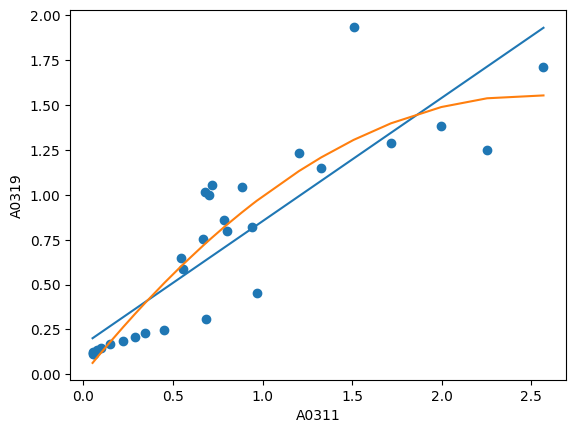

In [63]:
xdata1=xdata.sort_values(ascending=True)
# xdata1=np.linespace(start=min(xdata),stop=max(xdata),num=31)
popt1,pcov=optimize.curve_fit(func_poly_1,xdata,ydata)
yval1=func_poly_1(xdata,popt1[0],popt1[1])
print(r_square(ydata,yval1))
popt2,pcov=optimize.curve_fit(func_poly_2,xdata,ydata)
yval2=func_poly_2(xdata,popt2[0],popt2[1],popt2[2])
print(r_square(ydata,yval2))

plt.axis('equal')
plt.scatter(xdata,ydata)
plt.plot(xdata1,func_poly_1(xdata1,popt1[0],popt1[1]))
plt.plot(xdata1,func_poly_2(xdata1,popt2[0],popt2[1],popt2[2]))
plt.xlabel('A0311')
plt.ylabel('A0319')
plt.show()

In [30]:
xdata1=xdata.sort_values(ascending=True)

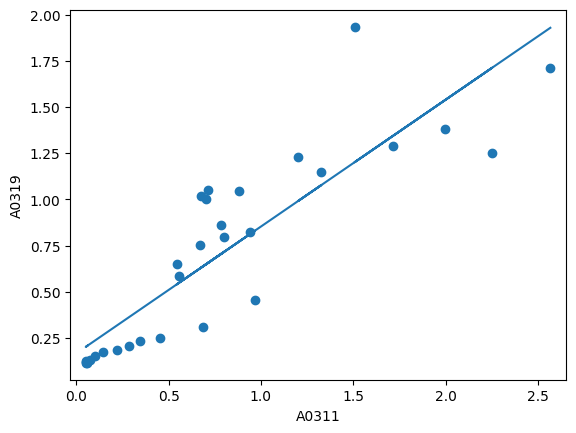

In [22]:
plt.axis('equal')
plt.scatter(xdata,ydata)
plt.plot(xdata,yval1)
plt.plot(xdata,yval2)
plt.xlabel('A0311')
plt.ylabel('A0319')
plt.show()

In [18]:
popt

array([0.68680074, 0.16587728])

In [19]:
model.score(xdata, ydata)

0.7750408470698158

In [21]:
ydata

1990    1.711741
1991    1.382529
1992    1.934043
1993    1.251551
1994    1.287336
1995    1.231038
1996    1.148359
1997    0.820812
1998    1.044769
1999    0.861114
2000    1.017032
2001    1.053269
2002    1.000120
2003    0.797900
2004    0.753322
2005    0.649703
2006    0.586115
2007    0.453441
2008    0.309347
2009    0.248600
2010    0.232887
2011    0.207252
2012    0.184048
2013    0.170950
2014    0.149313
2015    0.132786
2016    0.114313
2017    0.114437
2018    0.120532
2019    0.125093
2020    0.119403
Name: A0319, dtype: float64

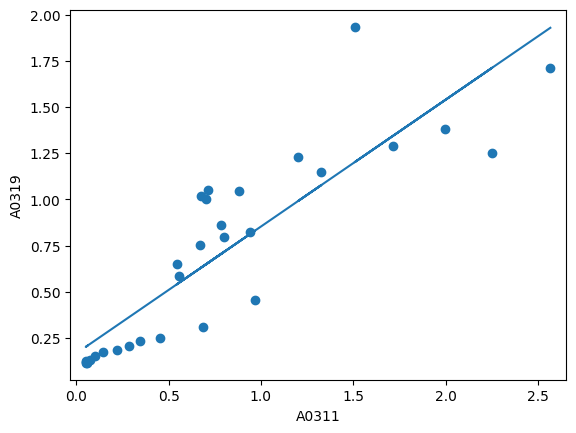

In [23]:
plt.axis('equal')
plt.scatter(xdata,ydata)
plt.plot(xdata,model.predict(xdata))
plt.xlabel('A0311')
plt.ylabel('A0319')
plt.show()

In [20]:
model.predict(xdata)

array([1.929315  , 1.53740943, 1.20150271, 1.71309666, 1.34473529,
       0.991844  , 1.0774722 , 0.81218654, 0.77240867, 0.70318716,
       0.63074341, 0.65733619, 0.64689459, 0.71705596, 0.62488184,
       0.53901991, 0.54841217, 0.8304137 , 0.63560106, 0.47643839,
       0.40228036, 0.36226318, 0.31831638, 0.26640314, 0.23516661,
       0.21839247, 0.20691291, 0.20324436, 0.20167858, 0.201138  ,
       0.20740518])

In [94]:
df_result.reset_index(drop=True)

年份,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,area_city,ind
0,3.968127,3.328312,2.404486,2.913093,3.192594,3.362190,2.670999,2.009446,1.643457,2.371324,...,0.229637,0.196918,0.176610,0.155309,0.161953,0.160498,0.162729,0.173295,1100,A0149
1,0.602061,0.451580,1.653643,3.179344,3.030944,2.835214,2.457459,1.973412,1.692971,1.441253,...,0.181734,0.135166,0.116077,0.098864,0.088760,0.081560,0.077068,0.086472,1100,A0190
2,2.567612,1.996987,1.507898,2.252792,1.716448,1.202629,1.327306,0.941043,0.883126,0.782337,...,0.146368,0.100887,0.076464,0.059749,0.054407,0.052128,0.051341,0.060466,1100,A0311
3,4.849933,4.179740,3.121613,2.111993,1.352794,0.936179,0.661624,0.459203,0.468057,0.776737,...,0.085827,0.076909,0.070527,0.063289,0.063992,0.069197,0.081329,0.107850,1100,A0313
4,1.711741,1.382529,1.934043,1.251551,1.287336,1.231038,1.148359,0.820812,1.044769,0.861114,...,0.170950,0.149313,0.132786,0.114313,0.114437,0.120532,0.125093,0.119403,1100,A0319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.408027,6599,E5021
211672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.851819,6599,F5191
211673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.922856,6599,F5281
211674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.969638,6599,L7113


In [45]:
# )&(df_result4['ind']=='L7213')
df_result4.loc[(df_result4['area_city']=='4505')&(df_result4['ind']=='C1493')]

,年份,area_city,ind,num,num_city,num_ind,num_year,rca,admin_name,Label,ind_cap
117619,1992,4505,C1493,1,775,273,258891,1.223637,北海市,冷冻饮品及食用冰制造,C
175715,1993,4505,C1493,1,1881,356,360137,0.537810,北海市,冷冻饮品及食用冰制造,C
191761,1994,4505,C1493,1,2314,425,435390,0.442717,北海市,冷冻饮品及食用冰制造,C
254597,1995,4505,C1493,1,2520,538,522338,0.385273,北海市,冷冻饮品及食用冰制造,C
322362,1996,4505,C1493,1,2672,594,610975,0.384947,北海市,冷冻饮品及食用冰制造,C
395512,1997,4505,C1493,1,2259,664,704354,0.469577,北海市,冷冻饮品及食用冰制造,C
646835,2000,4505,C1493,1,2321,761,970229,0.549306,北海市,冷冻饮品及食用冰制造,C
740726,2001,4505,C1493,1,1768,740,1046772,0.800089,北海市,冷冻饮品及食用冰制造,C
839034,2002,4505,C1493,3,1654,704,1131687,2.915677,北海市,冷冻饮品及食用冰制造,C
941414,2003,4505,C1493,4,1769,703,1260342,4.053827,北海市,冷冻饮品及食用冰制造,C


In [49]:
df_result.reset_index(drop=True)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,area_city,ind,admin_name,Label
0,3.968127,3.328312,2.404486,2.913093,3.192594,3.362190,2.670999,2.009446,1.643457,2.371324,...,0.176610,0.155309,0.161953,0.160498,0.162729,0.173295,1100,A0149,北京市,其他园艺作物种植
1,0.602061,0.451580,1.653643,3.179344,3.030944,2.835214,2.457459,1.973412,1.692971,1.441253,...,0.116077,0.098864,0.088760,0.081560,0.077068,0.086472,1100,A0190,北京市,其他农业
2,2.567612,1.996987,1.507898,2.252792,1.716448,1.202629,1.327306,0.941043,0.883126,0.782337,...,0.076464,0.059749,0.054407,0.052128,0.051341,0.060466,1100,A0311,北京市,牛的饲养
3,4.849933,4.179740,3.121613,2.111993,1.352794,0.936179,0.661624,0.459203,0.468057,0.776737,...,0.070527,0.063289,0.063992,0.069197,0.081329,0.107850,1100,A0313,北京市,猪的饲养
4,1.711741,1.382529,1.934043,1.251551,1.287336,1.231038,1.148359,0.820812,1.044769,0.861114,...,0.132786,0.114313,0.114437,0.120532,0.125093,0.119403,1100,A0319,北京市,其他牲畜饲养
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91512,NaN,NaN,4.841346,1.994379,3.216320,3.070770,2.690098,2.259413,1.076168,1.036729,...,0.534274,0.640287,0.558916,0.401781,0.442595,0.463703,4505,L7219,北海市,其他组织管理服务
91513,NaN,NaN,0.888439,0.422650,0.370383,0.337585,0.303663,0.364677,0.354672,0.362902,...,NaN,NaN,NaN,NaN,NaN,NaN,4505,M7492,北海市,专业设计服务
91514,NaN,NaN,3.670911,3.481098,3.109995,3.116947,3.198018,4.242164,4.457420,5.067013,...,NaN,NaN,NaN,NaN,NaN,NaN,4505,B1013,北海市,耐火土石开采
91515,NaN,NaN,1.223637,0.537810,0.442717,0.385273,0.384947,0.469577,NaN,NaN,...,6.403714,5.969199,5.710163,2.900678,3.272744,4.280329,4505,C1493,北海市,冷冻饮品及食用冰制造


In [48]:
df_result=pd.merge(left=df_result,right=df_city_code,left_on=['area_city'],right_on=['type_4'],how='left')
df_result=df_result.drop(columns=['type_4'])
df_result=pd.merge(left=df_result,right=df_small,left_on=['ind'],right_on=['Id'],how='left')
df_result=df_result.drop(columns=['Id'])

In [67]:
df=df_result.loc[(df_result['area_city']=='4505')&((df_result['ind']=='C1493')|(df_result['ind']=='C3735'))]
df_1=df.dropna(axis=1,how='any')

In [69]:
ls_col_se

['1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '2000',
 '2009',
 '2010',
 '2011']

In [70]:
df_2

,1992,1993,1994,1995,1996,1997,2000,2009,2010,2011,area_city,admin_name,Label
ind,,,,,,,,,,,,,
C1493,1.223637,0.537810,0.442717,0.385273,0.384947,0.469577,0.549306,7.075487,7.923936,9.030949,4505,北海市,冷冻饮品及食用冰制造
C3735,30.368446,7.658416,5.375849,4.710841,8.468826,10.058033,5.887633,7.390732,6.062289,6.709227,4505,北海市,船舶改装


In [73]:
ls_col_se

[1992, 1993, 1994, 1995, 1996, 1997, 2000, 2009, 2010, 2011]

In [79]:
ls_col=df_1.columns.tolist()
ls_col_se=[x for x in ls_col if x not in ['area_city','ind','admin_name','Label']]
df_2=df_1.set_index(['ind'])
df_2_data=df_2[ls_col_se].transpose()
xdata=df_2_data['C1493']
ydata=df_2_data['C3735']

In [89]:
df.iloc[0].values.tolist()[:-4]

[nan,
 nan,
 1.2236370081531371,
 0.5378100938420277,
 0.4427169657837206,
 0.38527320469699655,
 0.3849466471098208,
 0.46957684656287835,
 nan,
 nan,
 0.5493061409820974,
 0.8000886633239576,
 2.915677043256019,
 4.053827294314039,
 5.974195839375018,
 5.635097968069666,
 7.49867422178635,
 7.344482636073876,
 5.925008662842183,
 7.075487258531526,
 7.923936341525716,
 9.030948912964108,
 9.308174446635986,
 9.317306879991682,
 7.519438164028893,
 6.403714344731752,
 5.969199026891335,
 5.710163480131115,
 2.900678365619534,
 3.2727437697991215,
 4.280329326070958,
 '4505']

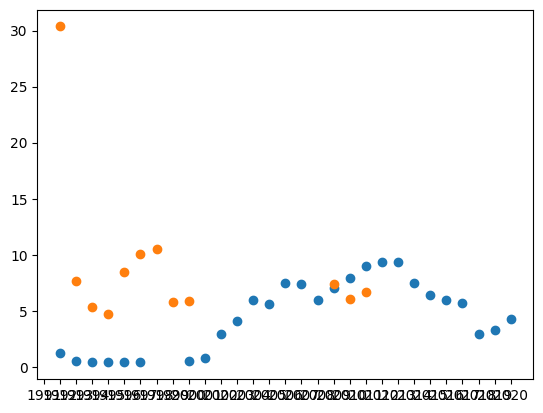

In [91]:
ls_colx=df.columns.tolist()
xdata=[x for x in ls_colx if x not in ['area_city','ind','admin_name','Label']]
ydata1=df.iloc[0].values.tolist()[:-4]
ydata2=df.iloc[1].values.tolist()[:-4]
# plt.axis('equal')
plt.scatter(xdata,ydata1,label='C1493')
plt.scatter(xdata,ydata2,label='C3735')
plt.show()

In [ ]:
plt.axis('equal')
plt.scatter(xdata,ydata)
plt.xlabel('C1493')
plt.ylabel('C3735')
plt.show()

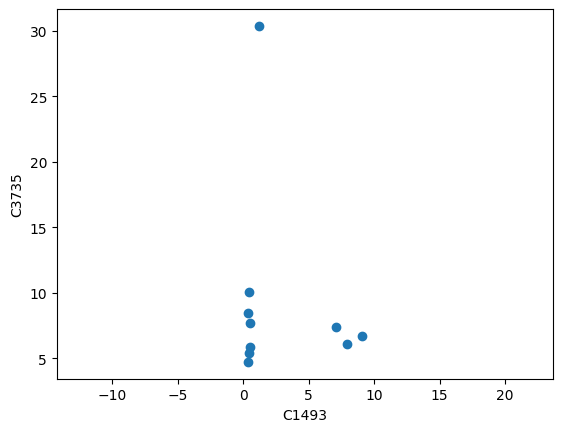

In [84]:
plt.axis('equal')
plt.scatter(xdata,ydata)
plt.xlabel('C1493')
plt.ylabel('C3735')
plt.show()

In [82]:
df_2_data

ind,C1493,C3735
1992,1.223637,30.368446
1993,0.537810,7.658416
1994,0.442717,5.375849
1995,0.385273,4.710841
1996,0.384947,8.468826
1997,0.469577,10.058033
2000,0.549306,5.887633
2009,7.075487,7.390732
2010,7.923936,6.062289
2011,9.030949,6.709227


In [ ]:
# 数据拟合方法
# 1、多项式拟合
def 